# Getting IMDB from movies reviews
(Avaliação de filmes e faturamentos)


In [80]:
# Importando pacotes
import pandas as pd

In [81]:
# Importando o dataset de treino
treino = pd.read_csv('desafio_indicium_imdb.csv')
treino

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# Pré-Processamento

In [82]:
# Visualizando as 10 primeiras
treino.head(10)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
5,6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
6,7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
7,8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
8,9,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"


In [83]:
# Visualizando as 10 últimas
treino.tail(10)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
989,990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
990,991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
991,992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
992,993,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
993,994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


# Checagens básicas
- shape
- colunas
- informações
- tipos
- valores nulos

In [84]:
# Retornando o shape da base
treino.shape

(999, 16)

In [85]:
# Verificando as colunas da base
treino.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [86]:
# Retornando as informações da base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [87]:
# Visualiizando quantidade de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

Gross            0.169169
Meta_score       0.157157
Certificate      0.101101
Unnamed: 0       0.000000
Runtime          0.000000
Genre            0.000000
Series_Title     0.000000
Released_Year    0.000000
Overview         0.000000
IMDB_Rating      0.000000
Star1            0.000000
Director         0.000000
Star2            0.000000
Star3            0.000000
Star4            0.000000
No_of_Votes      0.000000
dtype: float64

In [88]:
treino.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [89]:
# Removendo valores vazios
treino = treino.fillna(-1)

In [90]:
# Verificando novamente as informações
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)

Unnamed: 0       0.0
Series_Title     0.0
Released_Year    0.0
Certificate      0.0
Runtime          0.0
Genre            0.0
IMDB_Rating      0.0
Overview         0.0
Meta_score       0.0
Director         0.0
Star1            0.0
Star2            0.0
Star3            0.0
Star4            0.0
No_of_Votes      0.0
Gross            0.0
dtype: float64

In [91]:
# Verificando os tipos de dados
treino.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [92]:
treino.dtypes != 'object'

Unnamed: 0        True
Series_Title     False
Released_Year    False
Certificate      False
Runtime          False
Genre            False
IMDB_Rating       True
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes       True
Gross            False
dtype: bool

In [93]:
# Pegando apenas as colunas numéricas
col_nr = treino.select_dtypes(exclude=['object']).columns
col_nr

Index(['Unnamed: 0', 'IMDB_Rating', 'Meta_score', 'No_of_Votes'], dtype='object')

In [94]:
# Criar uma nova base com esses valores
treino = treino.loc[:,col_nr]

# Criando o modelo

In [95]:
# Selecionando X e y
X =  treino.drop('IMDB_Rating', axis=1)
y = treino.IMDB_Rating

In [96]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [97]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modelos algorítimos
- Regressão linear
- Árvore de regressão
- KneighborsRegressor

In [98]:
# Importando a regressão Linear
from sklearn.linear_model import LinearRegression

In [99]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [100]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [101]:
# Importando a árvore de regressão
from sklearn import tree

In [102]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [103]:
# Fazendo a previsão pros dados de teste
y_pred_ad = reg_ad.predict(X_test)

In [104]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [105]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [106]:
# Fazendo a previsão pros dados de teste
y_pred_knn = reg_knn.predict(X_test)

# Avaliando os erros Absolutos e o Quadráticos

In [107]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [108]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [109]:
# Avaliando o erro de Regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

0.05507802777799011
0.006994399373671338


In [110]:
# Avaliando o erro da Árvore de regressão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

0.0027272727272784855
0.00033333333333334384


In [111]:
# Avaliando o erro do KNN
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

0.18060606060606063
0.058681818181818196


# Plot visual da relação do y_test com as previsões feitas

In [112]:
# Importando o matplotlib
import matplotlib.pyplot as plt

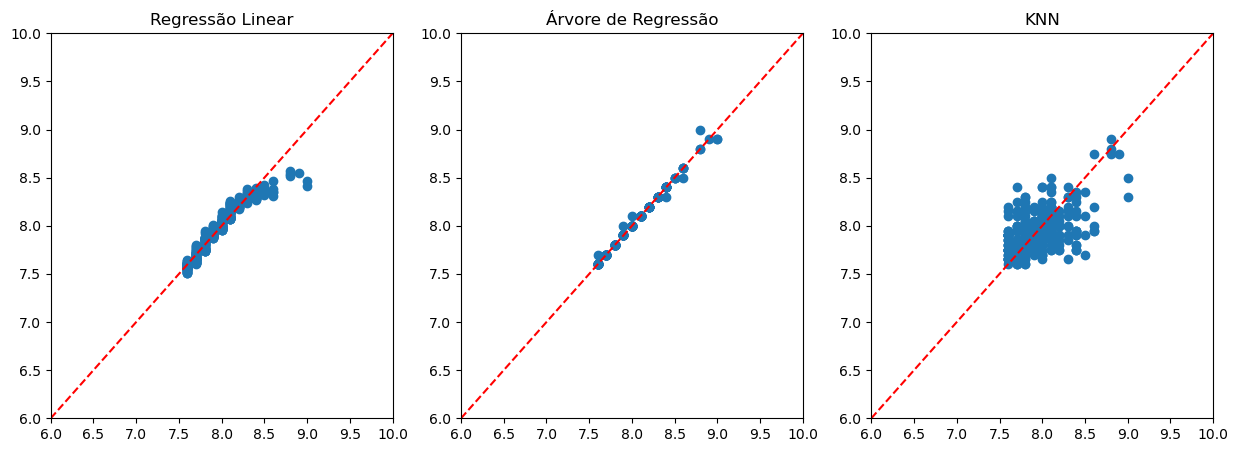

In [125]:
# Criando o gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].scatter(y_test, y_pred_rl)
ax[0].plot([6, 10], [6, 10],'--r')
ax[1].scatter(y_test, y_pred_ad)
ax[1].plot([6, 10], [6, 10],'--r')
ax[2].scatter(y_test, y_pred_knn)
ax[2].plot([6, 10], [6, 10],'--r')

ax[0].set(xlim=(6, 10), ylim=(6, 10))
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(6, 10), ylim=(6, 10))
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(6, 10), ylim=(6, 10))
ax[2].set_title('KNN')

plt.show()

O gráfico mostrou de forma bem definada o que os números dos modelos já tinham dito. Entre os três modelos a da árvore de regreção é o modelo mais adequado para ser usado para minhas futuras previsões.

# 1 Análise exploratória dos dados (EDA)

In [179]:
import matplotlib.pyplot as plt
import matplotlib as mlt

<function matplotlib.pyplot.show(close=None, block=None)>

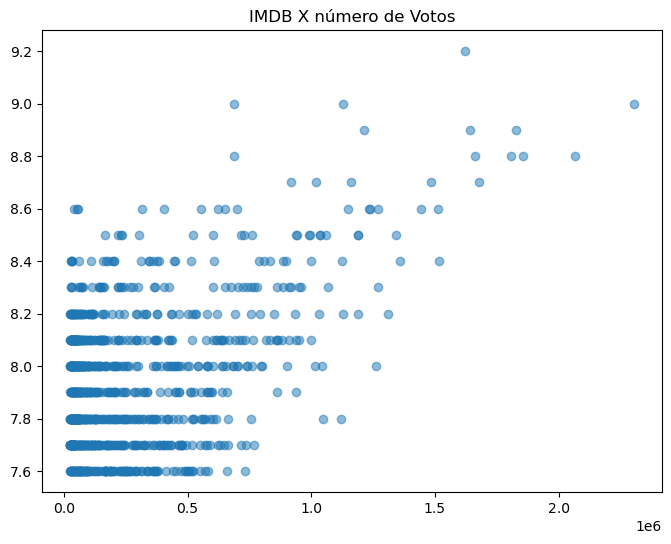

In [183]:
# IMDB x número de votos
plt.figure(figsize=(8,6))
plt.scatter(treino['No_of_Votes'], treino['IMDB_Rating'], alpha=0.5)
plt.title('IMDB X número de Votos')
plt.show

In [181]:
mr = treino[colunas_nr].corr()